# Presentación del hito 1

#### Objetivos del hito:
<ul>
<li>Entrenar un modelo preliminar con datos con marcado ficticio</li>
</ul>

## Training Set 
Se utilizaron polígonos con bandejas hechos "a mano" para identificar geográficamente la posición de las bandejas en los mesones. Luego se intersectaron estos polígonos con los puntos que representan la posición de las plantas y se guardó la cuenta de árboles por bandeja.
<img src="training_set_bandejas.png"/>

## Data augmentation

Aumentamos el tamaño del dataset x4, aplicando rotación en 180° y luego volteando (espejo)
### Dataset: 700 imágenes

<img src="data_augmentation.png"/>

## Modelo utilizado R3
<img src="arquitectura_r3.png"/>

## Resultados de R3

In [37]:
import numpy as np
import matplotlib.pyplot as plt
from restore_model import RestoreModel
import h5py
import pandas as pd
#plt.style.use('seaborn-whitegrid')
plt.rcParams.update({'font.size': 15})

In [28]:
model_path     = 'saved_model/popo/'
dir_train      = model_path+'train_set.h5'
dir_validation = model_path+'val_set.h5'
dir_test       = model_path+'test_set.h5'

### Learning curves

In [29]:
loss_val   = pd.read_csv(model_path+'curves/loss_val.csv')
loss_train = pd.read_csv(model_path+'curves/loss_train.csv')

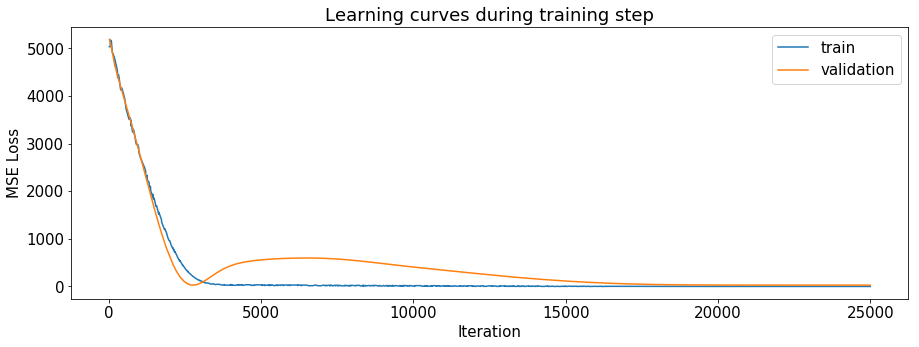

In [30]:
plt.figure(figsize=(15,5))
plt.plot(loss_train['Step'], loss_train['Value'], label='train')
plt.plot(loss_val['Step'], loss_val['Value'], label='validation')
plt.legend()
plt.ylabel('MSE Loss')
plt.xlabel('Iteration')
plt.title('Learning curves during training step')
plt.show()

### Predictions

In [31]:
with h5py.File(dir_test, 'r') as hf:
    images = hf['images'].value
    counts = hf['counts'].value

In [33]:
model = RestoreModel(model_path)
y_pred = model.test(images, counts[:,None])

INFO:tensorflow:Restoring parameters from saved_model/popo//model/best_model
test loss:  35.499035


In [51]:
difference = abs(y_pred - counts)
index_sorted = np.argsort(difference)

y_pred_sorted = y_pred[index_sorted]
x_sorted = images[index_sorted]
y_true_sorted = counts[index_sorted]

### Mejor Desempeño

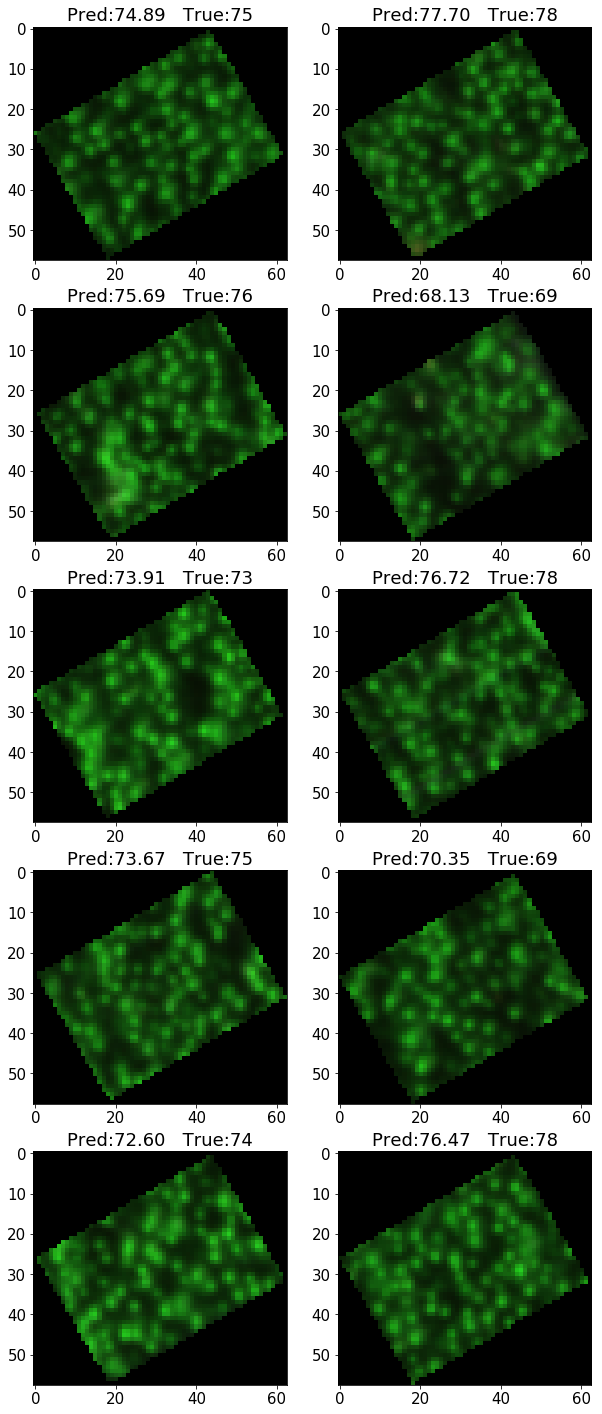

In [65]:
fig = plt.figure(figsize=(10,25))
count = 1
n_objects = 10
for y_p, y_t, im in zip(y_pred_sorted[0:n_objects], y_true_sorted[0:n_objects], x_sorted[0:n_objects]):
    fig.add_subplot(5,2,count)
    plt.imshow(im)
    plt.title(r'Pred:{0:.2f}   True:{1}'.format(round(y_p, 2), y_t))
    count+=1
    
plt.show()

### Peor Desempeño

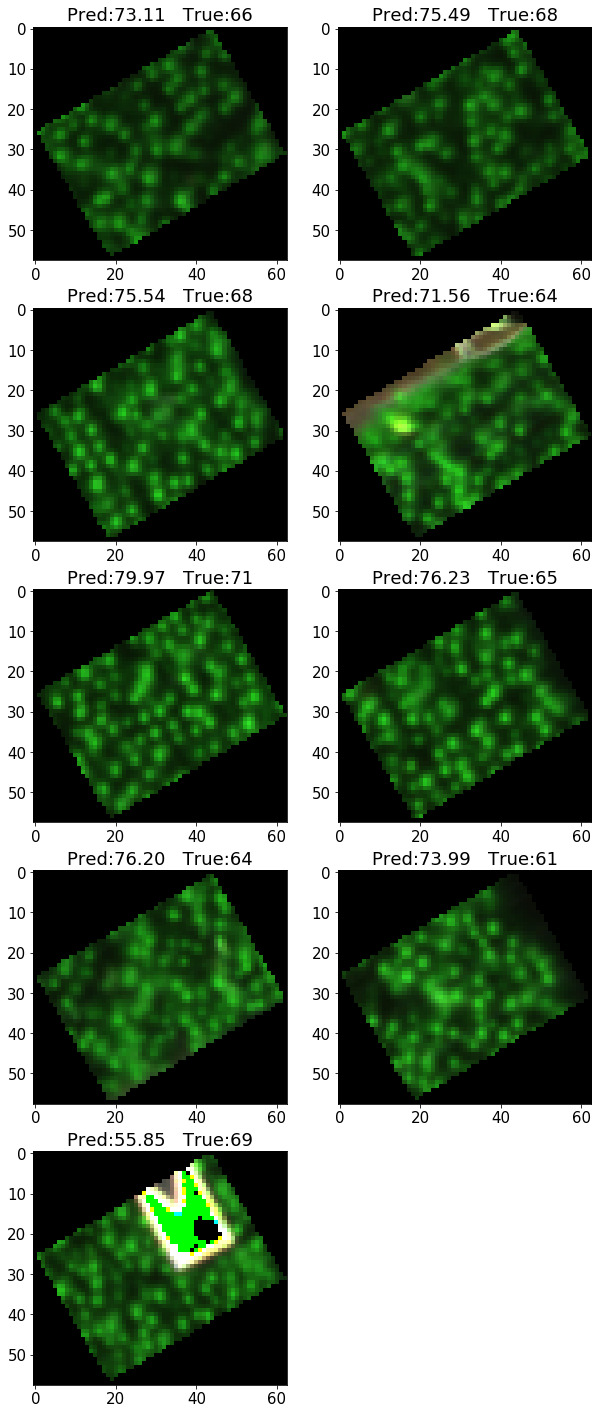

In [66]:
fig = plt.figure(figsize=(10,25))
count = 1
n_objects = 10
for y_p, y_t, im in zip(y_pred_sorted[-n_objects:-1], y_true_sorted[-n_objects:-1], x_sorted[-n_objects:-1]):
    fig.add_subplot(5,2,count)
    plt.imshow(im)
    plt.title(r'Pred:{0:.2f}   True:{1}'.format(round(y_p, 2), y_t))
    count+=1
plt.show()